IMPORTACIÓN DE DEPENDENCIAS

In [22]:
#Import openAI dependences (module)
import openai
import requests
import os
from io import BytesIO
from PIL import Image
import uuid

INGRESAR API KEY

In [23]:
#Add our API Key copied from openAI page
openai.api_key = ""

GENERACIÓN DEL PROMPT PARA TEXTO A TEXTO

In [24]:
nombre = input("Hola, soy tu asistente, vamos a crear un plan para una campaña de Marketing Digital. ¿Cual es tu nombre?")
print("¡Mucho gusto",nombre,"!")

#Make the context of our prompt envoirement
context_prompt_text = 'Eres especialista en la generación de prompts. A partir de los datos ingresados por el usuario, genera un prompt detallado y especifico para la planeación de una campaña de marketing digital.'

def make_prompt_text():
    print("Comencemos por responder unas preguntas")

    #prompt (text/user's question)
    actividadEconomica = input("¿Cual es la actividad económica de la empresa?")
    publicoObjetivo = input("¿A quienes va dirigida esta campaña?")
    contenido = input("¿Que tipo de contenido deseas usar?")
    canales = input("¿En que plataformas deseas distribuir el contenido de esta campaña?")
    
    prompt_text = f"Crea una campaña de marketing digital para un negocio de {actividadEconomica}, dirigida a {publicoObjetivo}, donde el tipo de contenido será: {contenido}, y se distribuira en {canales}"
    
    return prompt_text

prompt = make_prompt_text()
print(prompt)

Hola, soy tu asistente, vamos a crear un plan para una campaña de Marketing Digital. ¿Cual es tu nombre? Jesus


¡Mucho gusto Jesus !
Comencemos por responder unas preguntas


¿Cual es la actividad económica de la empresa? Venta de computadoras
¿A quienes va dirigida esta campaña? Estudiantes, padres de familia, profesionistas y gamers
¿Que tipo de contenido deseas usar? imagenes
¿En que plataformas deseas distribuir el contenido de esta campaña? Facebook


Crea una campaña de marketing digital para un negocio de Venta de computadoras, dirigida a Estudiantes, padres de familia, profesionistas y gamers, donde el tipo de contenido será: imagenes, y se distribuira en Facebook


GENERACIÓN DEL Y MUESTRA DEL PLAN

In [25]:
#Make the context of our prompt envoirement
context_prompt_text = f'Eres especialista en la generación de prompts. A partir de este texto: {prompt}, genera un prompt detallado y especifico para la planeación de una campaña de marketing digital.'

# Make the request
conversation = [
    {"role":"system", "content": context_prompt_text},
    {"role":"user", "content": prompt}
]
    
response = openai.ChatCompletion.create(
    model="gpt-4o-mini",
    messages = conversation,
    max_tokens=1000
)
    
message = response.choices[0]['message']
    
#Storage the response in a variable to use it
primer_conversasion = response['choices'][0]['message']['content'].strip()
    
#Use the varible
print(primer_conversasion)

### Prompt para la Planeación de una Campaña de Marketing Digital en Facebook

**Objetivo de la campaña:**
Incrementar la visibilidad y las ventas del negocio de computadoras, dirigiéndonos específicamente a cuatro segmentos de audiencia: estudiantes, padres de familia, profesionistas y gamers.

**Público objetivo:**
1. **Estudiantes:** Jóvenes entre 16 y 25 años que buscan computadoras portátiles y de escritorio para sus estudios.
2. **Padres de familia:** Adultos de 30 a 50 años que están interesados en comprar computadoras para sus hijos en edad escolar o universitaria.
3. **Profesionistas:** Adultos de 25 a 45 años que necesitan computadoras para su trabajo, valorando el rendimiento y la portabilidad.
4. **Gamers:** Jóvenes y adultos entre 15 y 35 años apasionados por los videojuegos, interesados en hardware de alto rendimiento.

**Tipo de contenido:**
Imágenes atractivas que destaquen los beneficios de cada tipo de computadora adaptada a cada público.

**Elementos del contenido:**

GENERACIÓN PROMPT TEXTO A IMAGEN

In [26]:
#Make the context of our prompt envoirement
context_img = f'basado en: {prompt}, crea un prompt para la generación de un banner'

def make_prompt_img():
    entrada = input("¿Deseas comenzar creando una imagen para esta campaña? (si/no)")
    if entrada.lower() == "si":
            
        #prompt (text/user's question)
        estilo = input("¿Tipo de imagen? (minimalista, hiperrealista, animación, moderno, etc.)")
        colores = input("¿Elige un máximo de tres colores para tu banner?")
        mensaje = input("¿Que te gustaria que transmitiera? (lujo, confianza, sostenibilidad, etc.)")
            
        prompt_img = f"Con base en este contexto: {context_img}, genera una imagen que no contenga texto y pero que contenga las siguientes caracteristicas - {estilo}. - {colores}. - {mensaje}."
        return prompt_img
    else:
        print("Espero la planeación te sea de ayuda. ")

gen_img = make_prompt_img()
print(gen_img)

¿Deseas comenzar creando una imagen para esta campaña? (si/no) Si
¿Tipo de imagen? (minimalista, hiperrealista, animación, moderno, etc.) minimalista
¿Elige un máximo de tres colores para tu banner? azul, amarillo y negro
¿Que te gustaria que transmitiera? (lujo, confianza, sostenibilidad, etc.) modernidad


Con base en este contexto: basado en: Crea una campaña de marketing digital para un negocio de Venta de computadoras, dirigida a Estudiantes, padres de familia, profesionistas y gamers, donde el tipo de contenido será: imagenes, y se distribuira en Facebook, crea un prompt para la generación de un banner, genera una imagen que no contenga texto y pero que contenga las siguientes caracteristicas - minimalista. - azul, amarillo y negro. - modernidad.


GENERACIÓN DE IMAGEN

In [27]:
# Make the request for the image prompt
image_response = openai.Image.create(
    model='dall-e-3',
    quality="standard",
    prompt=gen_img,
    n=1,
    # size="1024x1024"
)
    
# Get and print the generated image URL
print(image_response['data'][0]['url'])

https://oaidalleapiprodscus.blob.core.windows.net/private/org-p9Kazw1yC9YFk9cg7lA0ui7m/user-7aRbeHF8aQDVEGZmHvjT8eL2/img-O2jAqic2wGSkQb0Pb09cFqEu.png?st=2024-08-23T19%3A10%3A03Z&se=2024-08-23T21%3A10%3A03Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-08-23T18%3A14%3A24Z&ske=2024-08-24T18%3A14%3A24Z&sks=b&skv=2024-08-04&sig=nA2wclYiO/8Eyz5ztpM%2Bukqhk%2BPfWsVoyGCrrNLh8ws%3D


DESCARGAR Y MOSTRAR IMAGEN GENERADA

La imagen ha sido descargada y almacenada correctamente en: ./generated_images/4ef28610-89cc-47c6-bd06-598c837e8abf.png


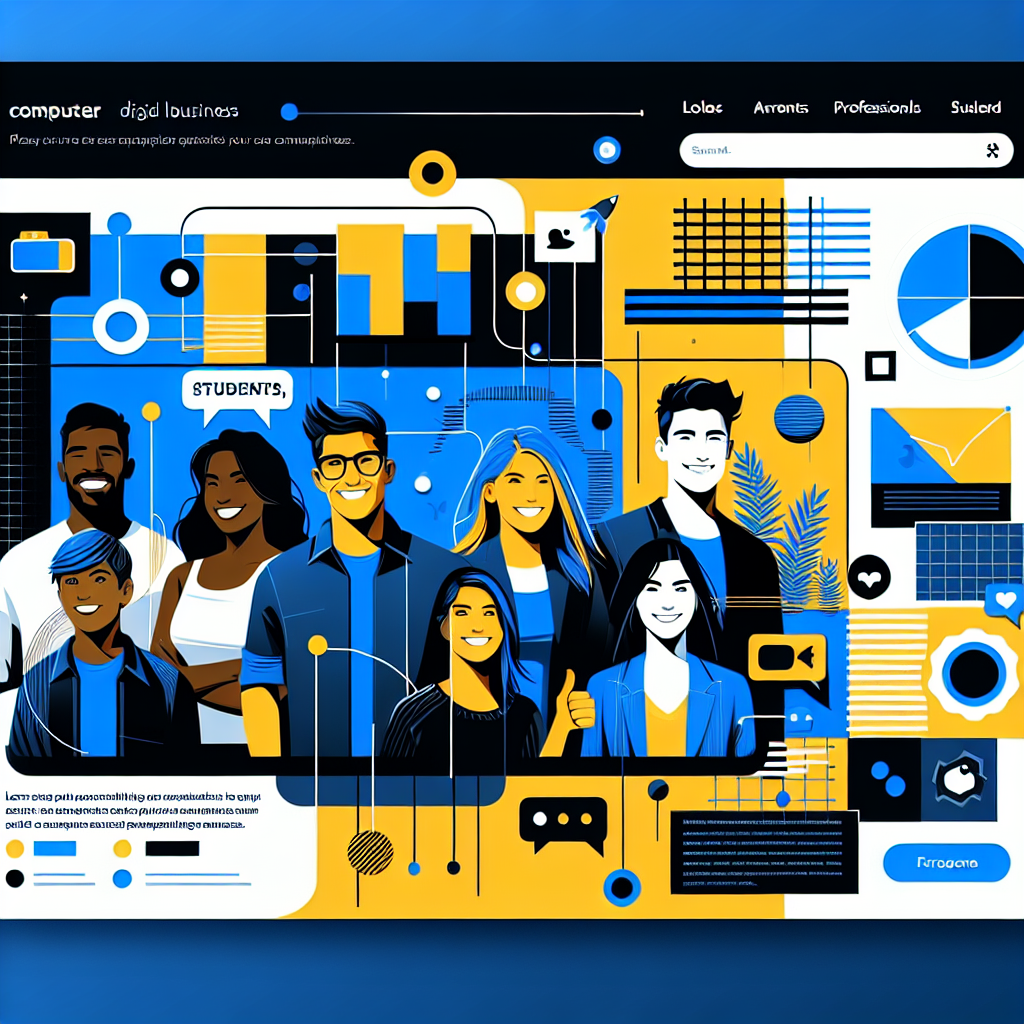

In [28]:
# Download the image
response = requests.get(image_response['data'][0]['url'])

# Verify if possible to download
if response.status_code == 200:
    # Get filename
    filename = str(uuid.uuid4()) + ".png"
    
    # Directory to save the image
    directory = "./generated_images/"
    
    # Make directory if not exists
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Complete path
    filepath = os.path.join(directory, filename)
    
    # Save the image
    with open(filepath, 'wb') as f:
        f.write(response.content)
        
    print("La imagen ha sido descargada y almacenada correctamente en:", filepath)
    img = Image.open(filepath)
    # print(f"Prompt utilizado: {prompt}")
    display(img)

else:
    print("Hubo un error al descargar la imagen.")